<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
imdb,info=tfds.load("imdb_reviews/subwords8k",with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2UA255/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2UA255/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2UA255/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data=imdb['train'],imdb['test']

In [24]:
#access the subwords tokenizer
tokenizer_subwords=info.features['text'].encoder

#take 2 trainining exmples and decode the text features
for example in imdb['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [6]:
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [25]:
#미리 훈련된 sub-words tokenizer가 잇어서, sub-words property를 보면 단어를 알 수 있다?
#문장을 어떻게 인코딩, 디코딩하는지 보고싶다면, encode/decode method를 부르면됨.
sample_string='TensorFlow, from basics to mastery'
tokenized_string=tokenizer_subwords.encode(sample_string)
print('tokenized string is{}'.format(tokenized_string))

original_string=tokenizer_subwords.decode(tokenized_string)
print('the origininal string: {}'.format(original_string))


tokenized string is[6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
the origininal string: TensorFlow, from basics to mastery


In [26]:
#어떤 토큰을 가지는지 보고싶다면, 각각의 element를 취한 뒤 디코딩하기
#case sensitive & punctuation is maintiained unlike the last tokenizer
for ts in tokenized_string:
  print ('{} ---> {}'.format(ts,tokenizer_subwords.decode([ts])))

6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [27]:
#clasifying IMDB with the tokenizer
import tensorflow as tf
embedding_dim=64
BUFFER_SIZE=10000
BATCH_SIZE=64
train_dataset=train_data.shuffle(BUFFER_SIZE)
train_dataset=train_dataset.padded_batch(BATCH_SIZE)
test_dataset=test_data.padded_batch(BATCH_SIZE)

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),#토크나이저에서 임베팅을 통해 나오는 벡터의모양은 쉽게 flatten되지 않기에 pooling사용
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [30]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)


Epoch 1/10
391/391 [==============================] - 19s 45ms/step - loss: 0.6732 - accuracy: 0.6225 - val_loss: 0.6198 - val_accuracy: 0.7639
Epoch 2/10
391/391 [==============================] - 17s 42ms/step - loss: 0.5001 - accuracy: 0.8126 - val_loss: 0.4197 - val_accuracy: 0.8467
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.3467 - accuracy: 0.8755 - val_loss: 0.3585 - val_accuracy: 0.8493
Epoch 4/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2842 - accuracy: 0.8982 - val_loss: 0.3344 - val_accuracy: 0.8622
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2467 - accuracy: 0.9114 - val_loss: 0.3122 - val_accuracy: 0.8788
Epoch 6/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2228 - accuracy: 0.9196 - val_loss: 0.3065 - val_accuracy: 0.8795
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2054 - accuracy: 0.9270 - val_loss: 0.3213 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'accuracy' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


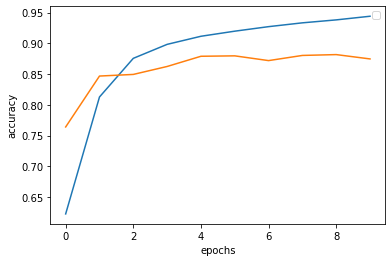

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'loss' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


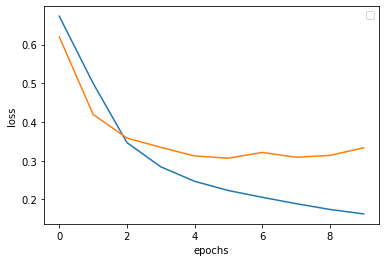

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string],'val_'+string)
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')